<a href="https://colab.research.google.com/github/yagomarialva/DataScience_IntroducaoaAnaliseDeSeriesTemporais/blob/main/Data_Science_Introdu%C3%A7%C3%A3o_a_an%C3%A1lise_de_series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Alucar - Analisando as vendas


In [2]:
import pandas as pd

In [3]:
pd.read_csv('dados/alucar.csv').head(5)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
alucar = pd.read_csv('dados/alucar.csv')

In [5]:
print('Quanditdade de linhas e colunas:', alucar.shape)

Quanditdade de linhas e colunas: (24, 2)


In [6]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [9]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

##Importanto Seaborn

In [10]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

     |████████████████████████████████| 215kB 5.7MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


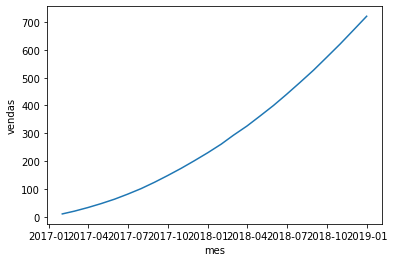

In [11]:
sns.lineplot(x='mes',y='vendas', data=alucar)

##Melhorando o gráfico

Text(0, 0.5, 'Vendas (R$)')

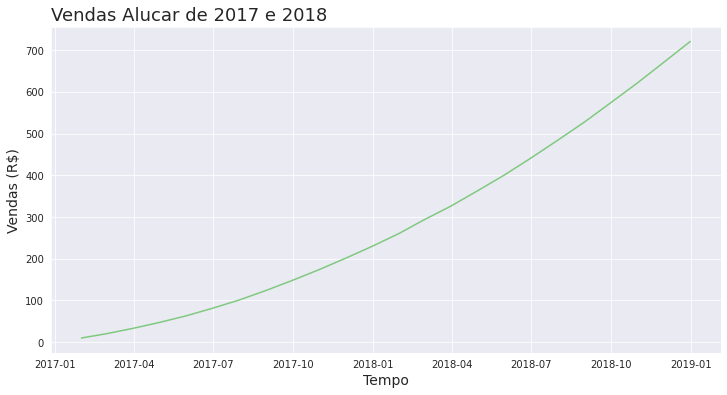

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left',fontsize=18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Vendas (R$)',fontsize=14)

##Decompondo as vendas




In [13]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head(5)

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [14]:
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

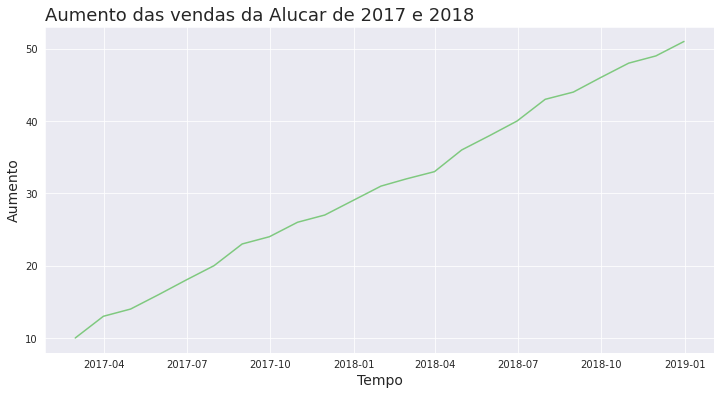

In [15]:
plotar ('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [16]:
alucar['aceleracao'] = alucar['aumento'].diff()

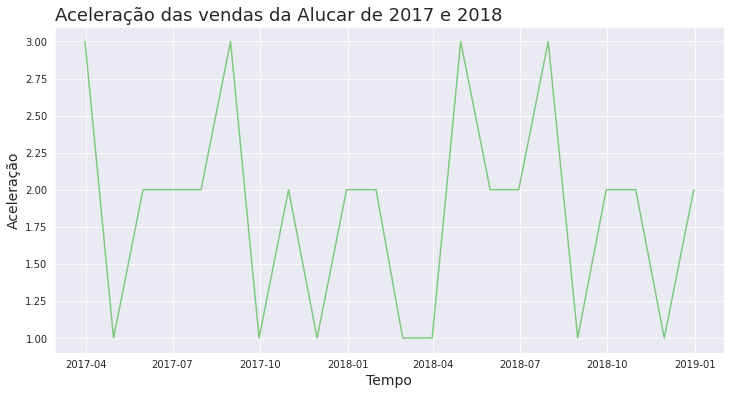

In [17]:
plotar ('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes','aceleracao', alucar)

In [18]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


No nosso projeto nós criamos o gráfico de vendas. Depois, utilizamos um método para decompor o valor do aumento e fizemos um gráfico do aumento. Depois, ainda decompusemos o aumento para descobrir a aceleração do aumento das vendas.

Para encontrar cada gráfico, precisamos scrollar a página. Seria mais fácil e intuitivo se tivéssemos esses três gráficos no mesmo lugar, mesmo que em plots diferentes. Vamos melhorar a intuitividade da análise juntando esses gráficos para visualizar todos.

Criaremos um espaço para inclui-los. Chamaremos o pyplotcomo plt, e passaremos um tamanho maior pra que essa visualização fique adequada. É interessante aprendermos que como temos três gráficos, queremos que isso ocupe três espaços, sem que haja um gráfico no meio. E dessa divisão, esse plot ocupará a primeira parte. Por isso, passaremos (3,1,1) para o subplot, dividindo e especificando como isso deverá ser feito. Setaremos o título e incluiremos o código do seaborn, que será o responsável por essa plotagem.

Temos o primeiro plot. Então, precisaremos separar um novo espaço para o próximo. A divisão será de 3 partes e queremos preencher tudo, mas esse plot deverá estar embaixo, na segunda parte, ou seja, no meio da divisão. Então, passaremos (3,1,2) para o subplot. Esse será nosso gráfico de aumento das vendas, então, copiaremos a linha do sns, trocando o y de vendas pelo aumento.

Por fim, queremos o mesmo para o terceiro gráfico. Pressionaremos "Ctrl C + Ctrl V" para copiar o colar o plt, substituindo a divisão (3,1,3), e da mesma forma, "Ctrl C + Ctrl V" para o sns, substituindo o y de aumento pela aceleração.



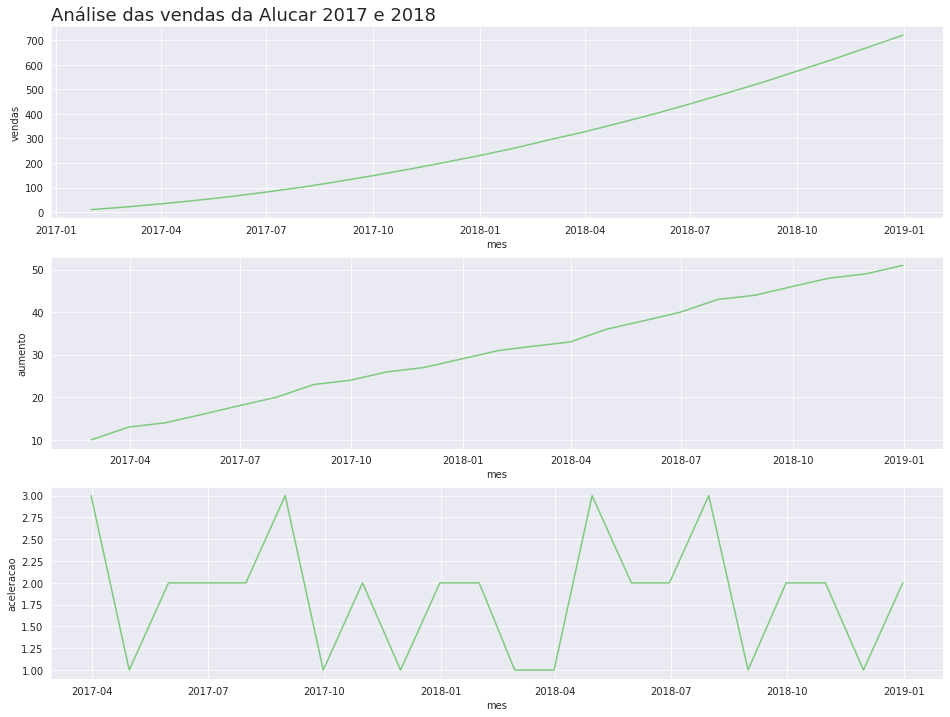

In [19]:

plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018',fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

Pressionaremos "Shift + Enter" e teremos, então, nossos três gráficos. Alteraremos o título para "Análise das vendas da Alucar de 2017 e 2018" e rodaremos novamente. Se quisermos incluir as outras variações, como aumentar o tamanho das labels, bastará usarmos o axe atribuir esses títulos para cada plot. Manteremos nosso projeto assim por enquanto para facilitar, pois vamos gerar mais gráficos que tenham três plots para comparação.

Então, copiaremos todo esse trecho de código e criaremos uma função chamada plot_comparaçao para utilizá-la nos próximos momentos em que precisarmos comparar três gráficos.

Vamos conferir o que temos em comum nos nossos plots. Nos três temos o mesmo valor de x, logo, podemos passar apenas um valor de x. O y, no entanto, se altera. Há também o DataSet e o título. É possível, se tiver vontade, criar um título para cada plot. Pressionaremos "Enter". e um "Ctrl + V" para colar todos os códigos anteriores. Será necessário identar corretamente para não haver erros. Também alteraremos os argumentos para poder passar nossos parâmetros.

In [20]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

Executaremos e aparentemente não haverá problemas. Faremos o teste escrevendo:


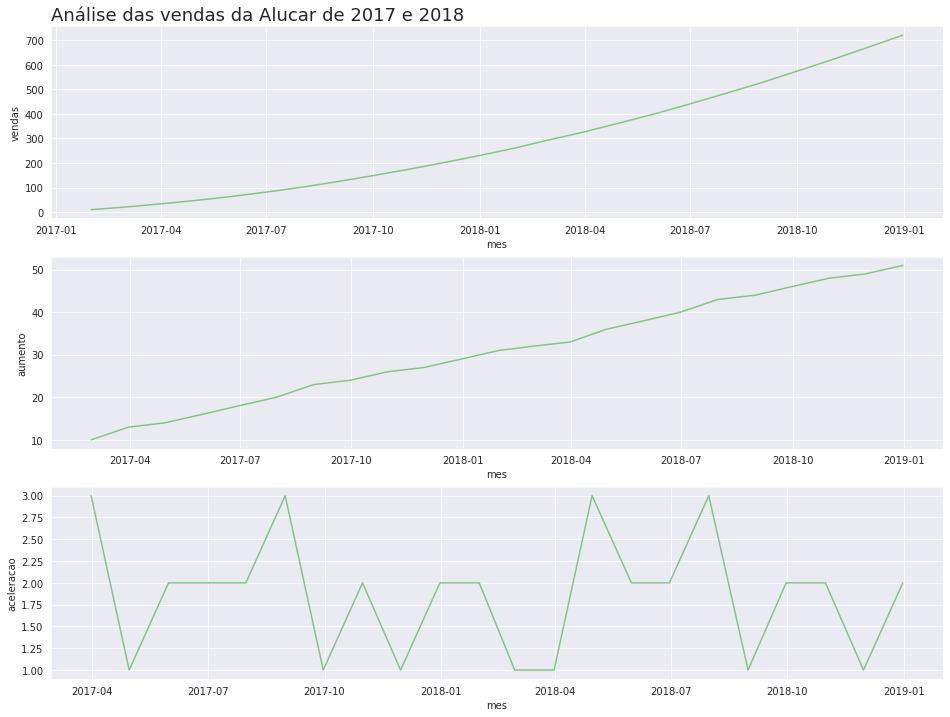

In [21]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018') 

Rodaremos e o programa trará os três plots.

É interessante que em todas as Time Series que formos utilizar haverá uma tendência. No caso dessa, a tendência, o que estará acontecendo com o valor, será um aumento. Fica claro entender isso com os gráficos juntos mostrando que há aumento das vendas conforme o passar dos meses, o crescimento mês a mês e a aceleração desse crescimento. Esses valores serão sempre positivos, em nenhum momento o aumento das vendas cairá.

Em resumo, com uma melhor visualização dos gráficos se torna muito melhor conseguirmos fazer nossas análises.